In [1]:
import os
import subprocess
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

git_root = (
    subprocess.check_output(["git", "rev-parse", "--show-toplevel"], text=True)
    .strip()
)

base_dir = os.path.join(git_root, "data")
image_dir = os.path.join(git_root, "documentation", "images")

In [2]:


data = []

# Walk through the directory structure
for source in os.listdir(base_dir):
    source_dir = os.path.join(base_dir, source)
    if os.path.isdir(source_dir):
        for niveau in os.listdir(source_dir):
            niveau_dir = os.path.join(source_dir, niveau)
            if os.path.isdir(niveau_dir):
                for article_dir in os.listdir(niveau_dir):
                    article_path = os.path.join(niveau_dir, article_dir)
                    if os.path.isdir(article_path):
                        content_file = os.path.join(article_path, "Content.txt")
                        audio_file = os.path.join(article_path, "Audio.mp3")
                        
                        has_audio = os.path.isfile(audio_file)
                        
                        with open(content_file, 'r') as file:
                            content = file.read()
                        
                        article_length = len(content.split())

                        data.append({
                            "source": source,
                            "niveau": niveau,
                            "article": article_dir,
                            "has_audio": has_audio,
                            "length": article_length
                        })

# Convert to DataFrame
df = pd.DataFrame(data)
df.head()


,source,niveau,article,has_audio,length
0,dlf,easy,2024-05-03-Demonstrationen_am_1_Mai,True,138
1,dlf,easy,2024-05-03-Gerichts-Hof_entscheidet_fuer_Deuts...,True,177
2,dlf,easy,2024-05-03-Neues_Gesetz_zum_Klima-Schutz,True,124
3,dlf,easy,2024-05-03-Reichs-Buerger_vor_Gericht,True,139
4,dlf,easy,2024-05-03-Wahl-Kampf_fuer_Europa-Wahl,True,137


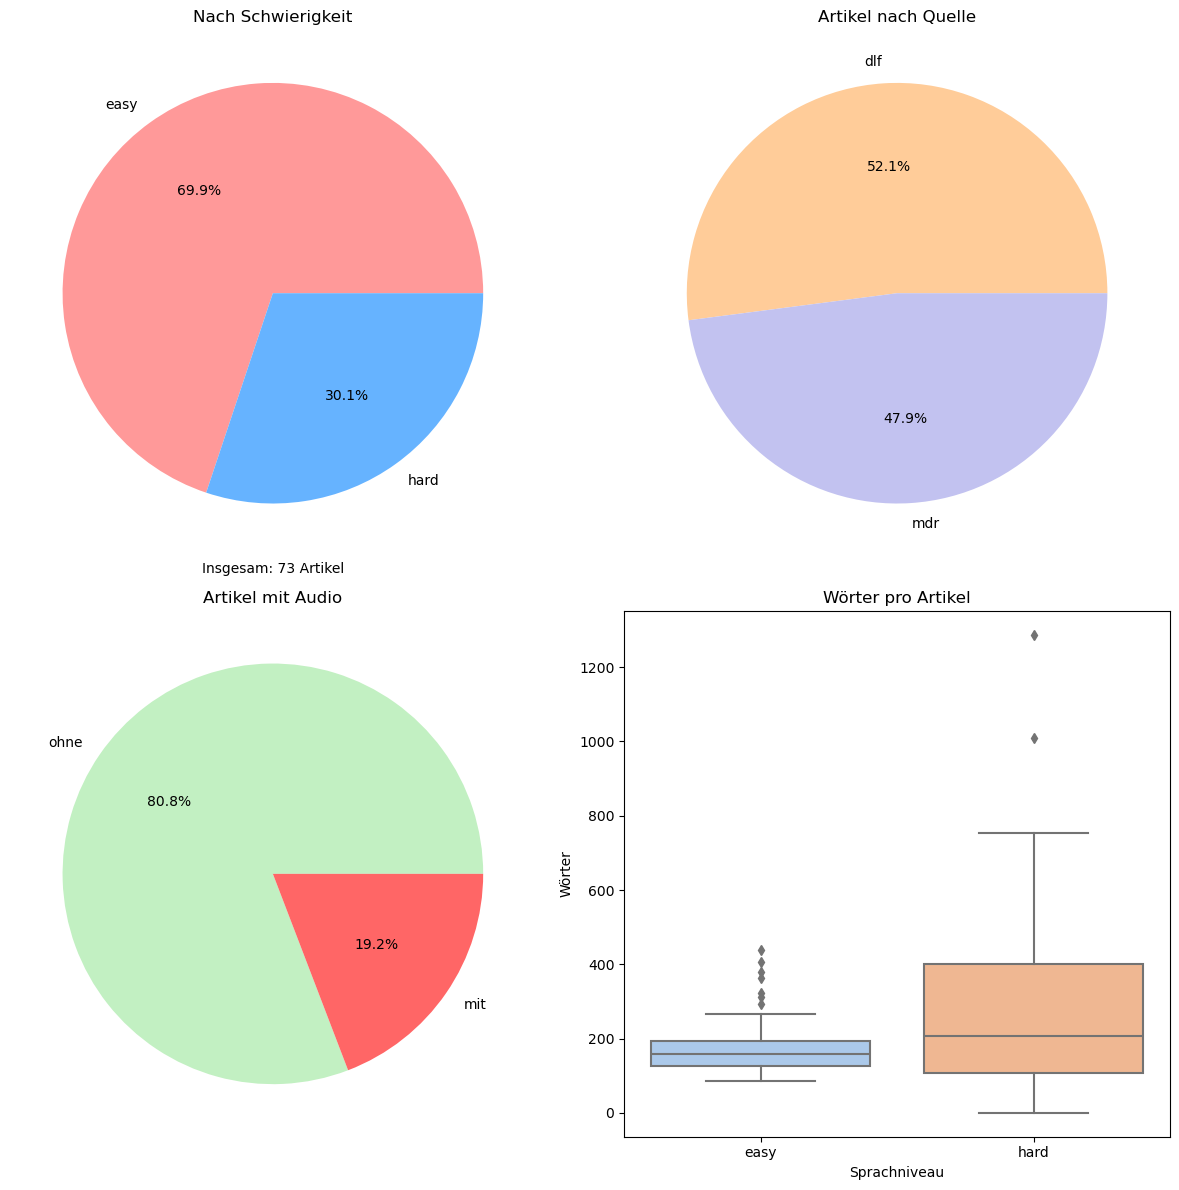

In [3]:
# Total number of articles
total_articles = df['article'].nunique()

# Plot settings
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Number of articles by difficulty
articles_by_niveau = df['niveau'].value_counts()
axs[0, 0].pie(articles_by_niveau, labels=articles_by_niveau.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axs[0, 0].set_title('Nach Schwierigkeit')
axs[0, 0].set_xlabel(f'Insgesam: {total_articles} Artikel')

# Number of articles by source
articles_by_source = df['source'].value_counts()
axs[0, 1].pie(articles_by_source, labels=articles_by_source.index, autopct='%1.1f%%', colors=['#ffcc99','#c2c2f0','#ffb3e6'])
axs[0, 1].set_title('Artikel nach Quelle')

# Number of articles with audio
articles_with_audio = df['has_audio'].value_counts()
articles_with_audio.index = ['ohne', 'mit']
axs[1, 0].pie(articles_with_audio, labels=articles_with_audio.index, autopct='%1.1f%%', colors=['#c2f0c2','#ff6666'])
axs[1, 0].set_title('Artikel mit Audio')

# Length difference between easy and hard articles using seaborn box plot
sns.boxplot(x='niveau', y='length', data=df, ax=axs[1, 1], palette='pastel')
axs[1, 1].set_title('Wörter pro Artikel')
axs[1, 1].set_xlabel('Sprachniveau')
axs[1, 1].set_ylabel('Wörter')

plt.tight_layout()
plt.savefig(os.path.join(image_dir, 'data_overview.png'))
plt.show()

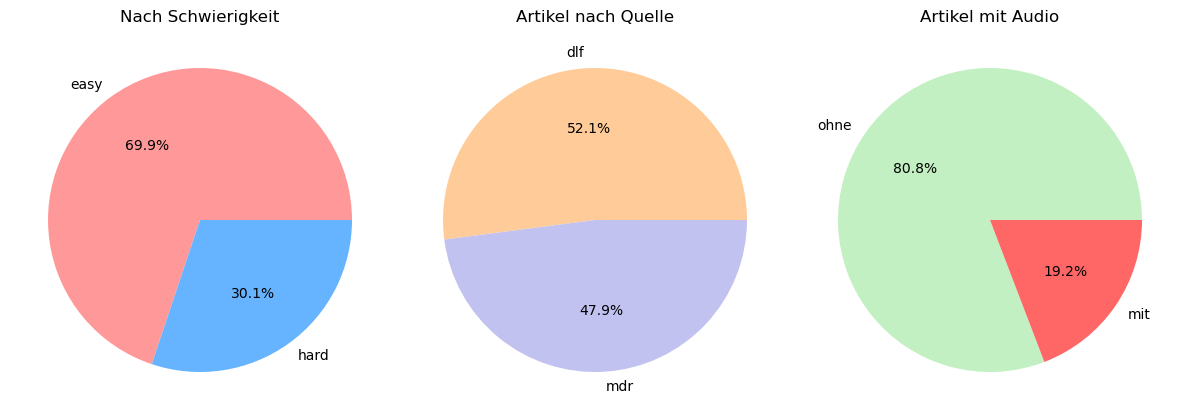

In [6]:
# Total number of articles
total_articles = df['article'].nunique()

# Plot settings
fig, axs = plt.subplots(1, 3, figsize=(12, 12))

# Number of articles by difficulty
articles_by_niveau = df['niveau'].value_counts()
axs[0].pie(articles_by_niveau, labels=articles_by_niveau.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axs[0].set_title('Nach Schwierigkeit')

# Number of articles by source
articles_by_source = df['source'].value_counts()
axs[1].pie(articles_by_source, labels=articles_by_source.index, autopct='%1.1f%%', colors=['#ffcc99','#c2c2f0','#ffb3e6'])
axs[1].set_title('Artikel nach Quelle')

# Number of articles with audio
articles_with_audio = df['has_audio'].value_counts()
articles_with_audio.index = ['ohne', 'mit']
axs[2].pie(articles_with_audio, labels=articles_with_audio.index, autopct='%1.1f%%', colors=['#c2f0c2','#ff6666'])
axs[2].set_title('Artikel mit Audio')

plt.tight_layout()
plt.savefig(os.path.join(image_dir, 'data_overview.png'))